LABORATORIO - 4 - PRESENCIAL  - Hineill David Céspedes Espinoza - 20213704

PREGUNTA 1 : 
Se tiene una señal obtenida de un EMG (Electromiograma) con 1 activación muscular en el archivo
(EMG_raw.npy). Esta ha sido muestreada a 1 kHz y se encuentra contaminada con ruido de alta frecuencia

a)  ASINCRONA ,  Cargar la señal EMG y graficarla en el dominio del tiempo. Calcular la
transformada de Fourier y graficar la magnitud de la respuesta en frecuencia de la señal,
destacando el ruido a 60 Hz mediante líneas verticales (1 punto)

In [3]:
#-----------IMPORTAMOS LAS LIBRERÍAS
import numpy as np
import matplotlib.pyplot as plt

C:\Users\Hineill\AppData\Local\Temp\ipykernel_56960\2109633090.py:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


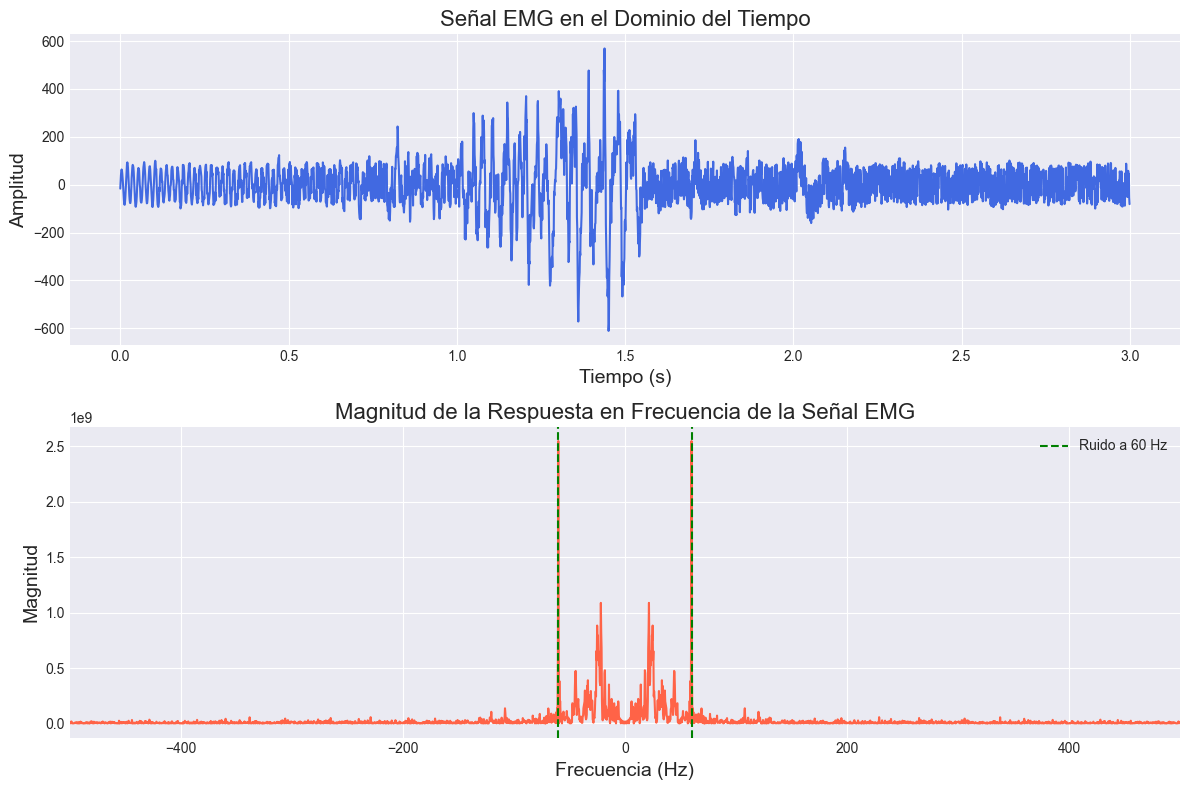

In [4]:
emg_signal = np.load("EMG_raw.npy")  
fs = 1000  
n_samples = len(emg_signal)
t = np.arange(n_samples) / fs

fft_emg_signal = np.fft.fftshift(np.fft.fft(emg_signal))
freq = (np.arange(n_samples) - n_samples/2) * fs / n_samples
magnitud_fft_emg_signal = np.abs(fft_emg_signal)**2
plt.style.use('seaborn-darkgrid')  
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))
ax1.plot(t, emg_signal, color='royalblue')
ax1.set_title('Señal EMG en el Dominio del Tiempo', fontsize=16)
ax1.set_xlabel('Tiempo (s)', fontsize=14)
ax1.set_ylabel('Amplitud', fontsize=14)
ax1.grid(True)
ax2.plot(freq, magnitud_fft_emg_signal, color='tomato')
ax2.axvline(60, color='green', linestyle='--', label='Ruido a 60 Hz')
ax2.axvline(-60, color='green', linestyle='--')
ax2.set_title('Magnitud de la Respuesta en Frecuencia de la Señal EMG', fontsize=16)
ax2.set_xlabel('Frecuencia (Hz)', fontsize=14)
ax2.set_ylabel('Magnitud', fontsize=14)
ax2.set_xlim(-fs/2, fs / 2)  
ax2.legend()
ax2.grid(True)
plt.tight_layout()
plt.show()

b) [Tarea asíncrona] Diseñar un filtro FIR utilizando el método de ventanas con una ventana de
Hamming, con frecuencia de corte de 50 Hz y 33 coeficientes. Graficar la respuesta impulsiva, su
magnitud y fase de la respuesta en frecuencia para ambas ventanas, comparándolas con la
respuesta ideal (1 punto).

C:\Users\Hineill\AppData\Local\Temp\ipykernel_56960\3903193386.py:12: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(coeficiente_filtro_enventanado, use_line_collection=True, basefmt=" ")


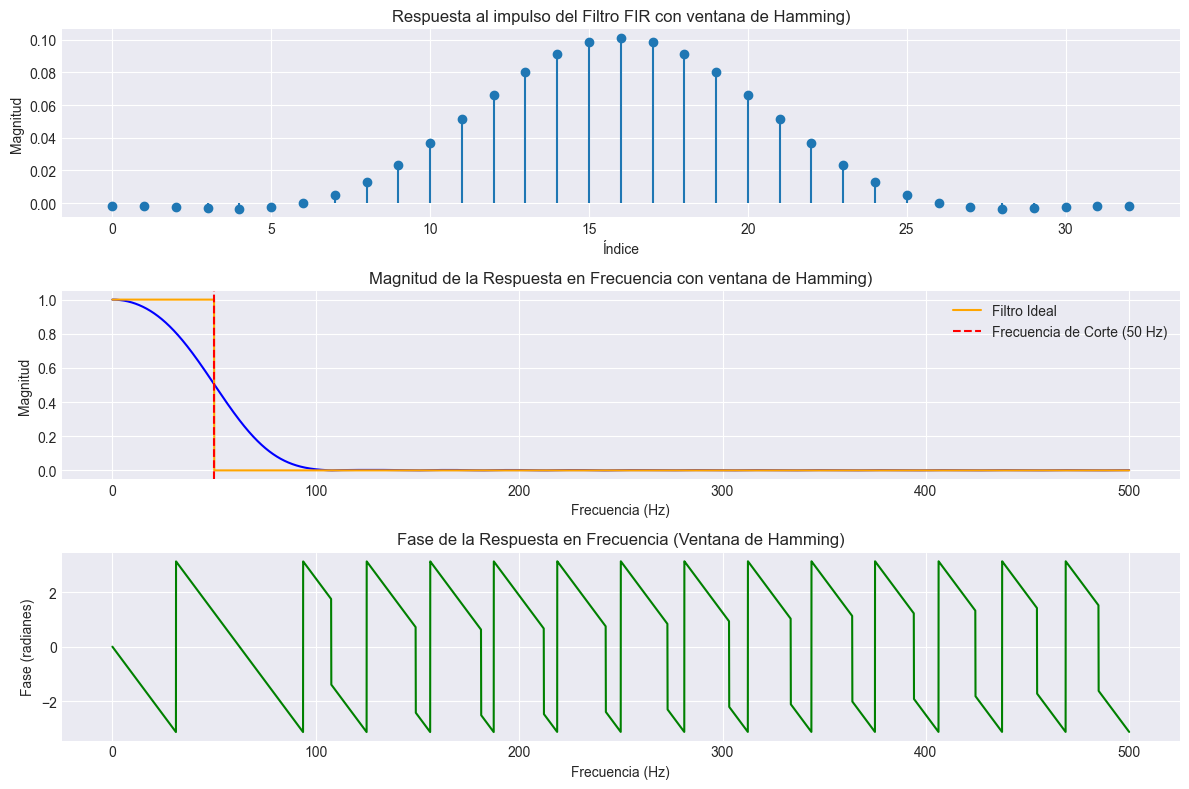

In [ ]:
from scipy.signal import firwin, freqz
fs = 1000  #Hz
fc = 50   #Hz
# Diseño del filtro FIR con ventana de Hamming
#ASUMIMOS QUE LA FRECUENCIA DE MUESTREO DE LA SINC ES EL MISMO Q EL DE LA SEÑAL DEL ELECTROCARDIOGRAMA
coeficiente_filtro_enventanado = firwin(33, fc, fs=fs, window="hamming")
#CALCULAMOS LA RESPUESTA EN FRECUENCIA DEL FILTRO 
w, h = freqz(coeficiente_filtro_enventanado, worN=10000, fs=fs)
# Graficar la respuesta impulsiva del filtro
plt.figure(figsize=(12, 8))
plt.subplot(3, 1, 1)
plt.stem(coeficiente_filtro_enventanado, use_line_collection=True, basefmt=" ")
plt.title("Respuesta al impulso del Filtro FIR con ventana de Hamming)")
plt.xlabel("Índice")
plt.ylabel("Magnitud")
# Graficar la magnitud de la respuesta en frecuencia
plt.subplot(3, 1, 2)
plt.plot(w, abs(h), color='blue')
plt.plot(w, np.where(w <= fc, 1, 0), color='orange', label="Filtro Ideal")  # +1e-10 para evitar log(0)
plt.title("Magnitud de la Respuesta en Frecuencia con ventana de Hamming)")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Magnitud")
plt.grid(True)
plt.axvline(50, color='red', linestyle='--', label="Frecuencia de Corte (50 Hz)")
plt.legend()
plt.subplot(3, 1, 3)
plt.plot(w, np.angle(h), color='green')
plt.title("Fase de la Respuesta en Frecuencia (Ventana de Hamming)")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Fase (radianes)")
plt.grid(True)
plt.tight_layout()
plt.show()
respuesta_impulsiva_filtro_ventana_hamming=coeficiente_filtro_enventanado

c) Diseñar un filtro FIR utilizando el método de mínimos cuadrados con 45 muestras en
frecuencia, 33 coeficientes y frecuencia de corte de 50 Hz. Graficar la magnitud y fase de la
respuesta en frecuencia, comparándola con la respuesta ideal (1 punto).

In [26]:
def plotear_respuesta_impulso_espectro_magnitud_fase(h_n ,espectro,frecuencias ,  title ,fc): #fc normalizado
    plt.figure(figsize=(12, 8))
    plt.subplot(3, 1, 1)
    plt.stem(h_n, use_line_collection=True, basefmt=" ")
    plt.title(f"Respuesta al impulso de {title} " )
    plt.xlabel("Índice")
    plt.ylabel("Magnitud")
    # Graficar la magnitud de la respuesta en frecuencia
    plt.subplot(3, 1, 2)
    plt.plot(frecuencias, np.abs(espectro), color='blue')
    plt.plot(frecuencias, np.where(frecuencias <= fc, 1, 0), color='orange', label="Filtro Ideal")  
    plt.title(f"Espectro de magnitud de respuesta en frecuencia de {title}")
    plt.xlabel("Frecuencia (Hz)")
    plt.ylabel("Magnitud")
    plt.grid(True)
    plt.legend()
    plt.subplot(3, 1, 3)
    plt.plot(frecuencias, np.angle(espectro), color='green')
    plt.title(f"Espectro de fase de respuesta en frecuencia de {title}")
    plt.xlabel("Frecuencia (Hz)")
    plt.ylabel("Fase (radianes)")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

C:\Users\Hineill\AppData\Local\Temp\ipykernel_56960\3390547587.py:4: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(h_n, use_line_collection=True, basefmt=" ")


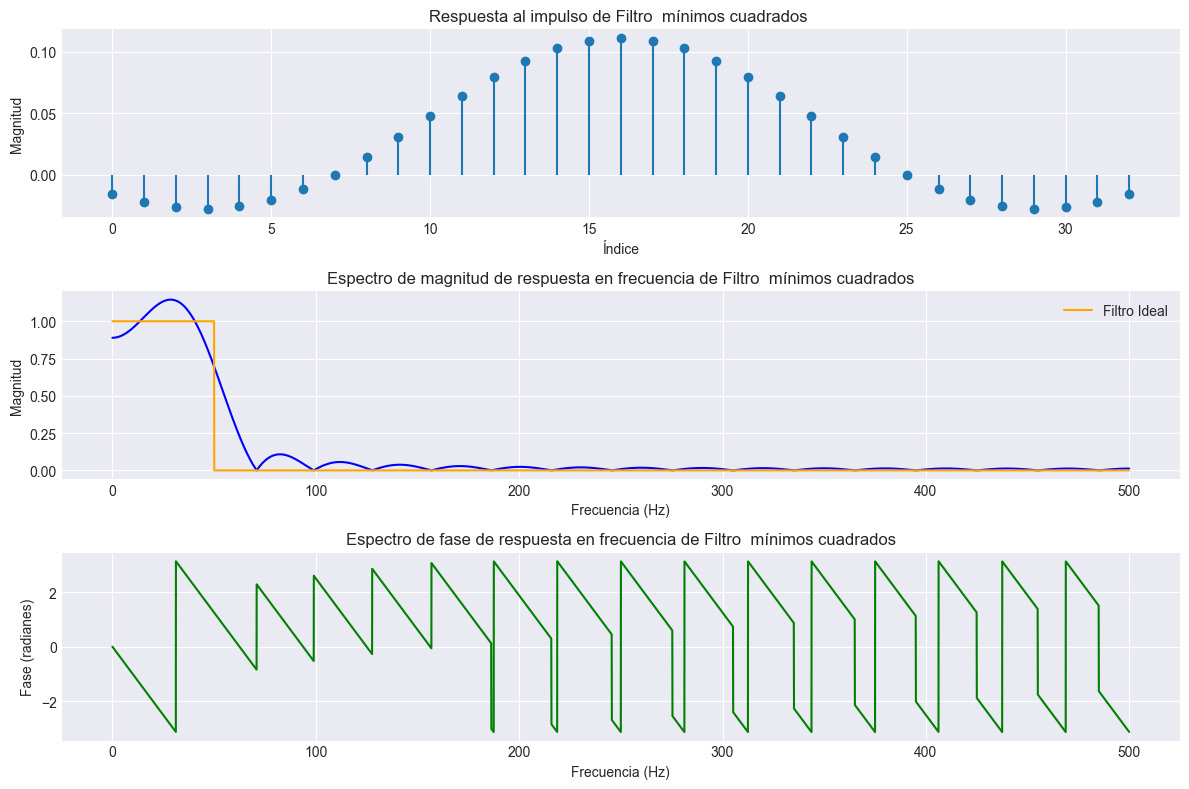

In [32]:
# Filtro pasabajos ideal truncado
fc = 50
wc = 2*np.pi * (fc/fs)

def HPB(w,wc,nd):
    mask = np.abs(w)<=wc
    H = np.exp(-1j*w*nd)
    H[~mask] = 0
    return H

Nw = 45 # Número de muestras en frecuencia
M = 33 # Longitud del filtro

w = 2*np.pi*(np.arange(Nw)-np.fix(Nw/2)) / Nw
Hw = HPB(w,wc,(M-1)/2)

wid = np.linspace(-np.pi,np.pi,1001)
Hid = HPB(wid,wc,(M-1)/2)

# Matriz de Fourier

A = np.zeros((Nw,M),dtype=complex)
n = np.arange(M)
for k in range(Nw):
    A[k,:] = np.exp(-1j*w[k]*n)

hn = np.matmul(np.linalg.inv(np.matmul(np.conj(A.T),A)),np.matmul(np.conj(A.T),Hw))
# Respuesta en frecuencia
w, h = freqz(hn, worN=10000, fs=fs)


plotear_respuesta_impulso_espectro_magnitud_fase(hn ,h ,w , "Filtro  mínimos cuadrados" , 50 )

respuesta_impulsiva_minimos_cuadrados = hn

d) Diseñar un filtro FIR utilizando el método de muestreo en frecuencia, con frecuencia de corte
de 50 Hz, y 33 coeficientes. Graficar la magnitud y fase de la respuesta en frecuencia, y
compararlas con la respuesta ideal (1 punto).

C:\Users\Hineill\AppData\Local\Temp\ipykernel_56960\3390547587.py:4: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(h_n, use_line_collection=True, basefmt=" ")


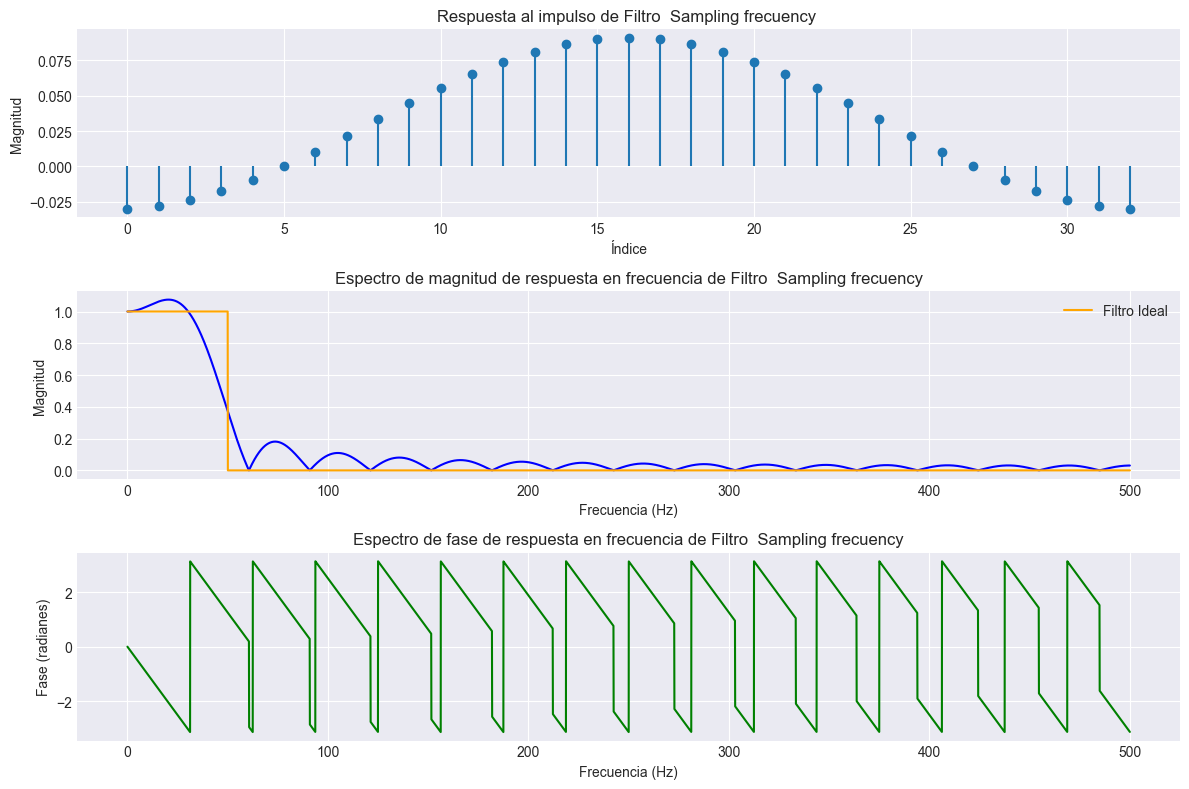

In [ ]:
wc=2*np.pi*(fc/fs)
L=33

#Calcular la respuesta impulsiva
w=2*np.pi*(np.arange(L)-((L-1)/2)) / L

def HPB(w,wc):
    H = 1*(np.abs(w)<wc)
    return H

Hw = HPB(w,wc)

wid = np.linspace(-np.pi,np.pi,1001)
Hid = HPB(wid,wc)

alpha = w[int(np.fix(L/2))]
Hw_shift = np.fft.ifftshift(Hw)
hn = np.fft.ifft(Hw_shift)
hn = np.fft.fftshift(hn) * np.exp(1j*alpha*(np.arange(L)-L/2))

# Respuesta en frecuencia

w, h = freqz(hn, worN=10000, fs=fs)


plotear_respuesta_impulso_espectro_magnitud_fase(hn ,h ,w , "Filtro  Sampling frecuency" , 50 )

respuesta_impulsiva_frecuencia_muestreada = hn


e) Aplicar los filtros diseñados (Hamming, mínimos cuadrados y muestreo en frecuencia) a la señal
EMG. Graficar las señales filtradas en el dominio del tiempo y las magnitudes de sus respectivas
respuestas en el dominio de la frecuencia comparándolas la magnitud de la respuesta en
frecuencia de la señal original. Mencionar qué filtro logró el mejor desempeño y por qué (1
punto).

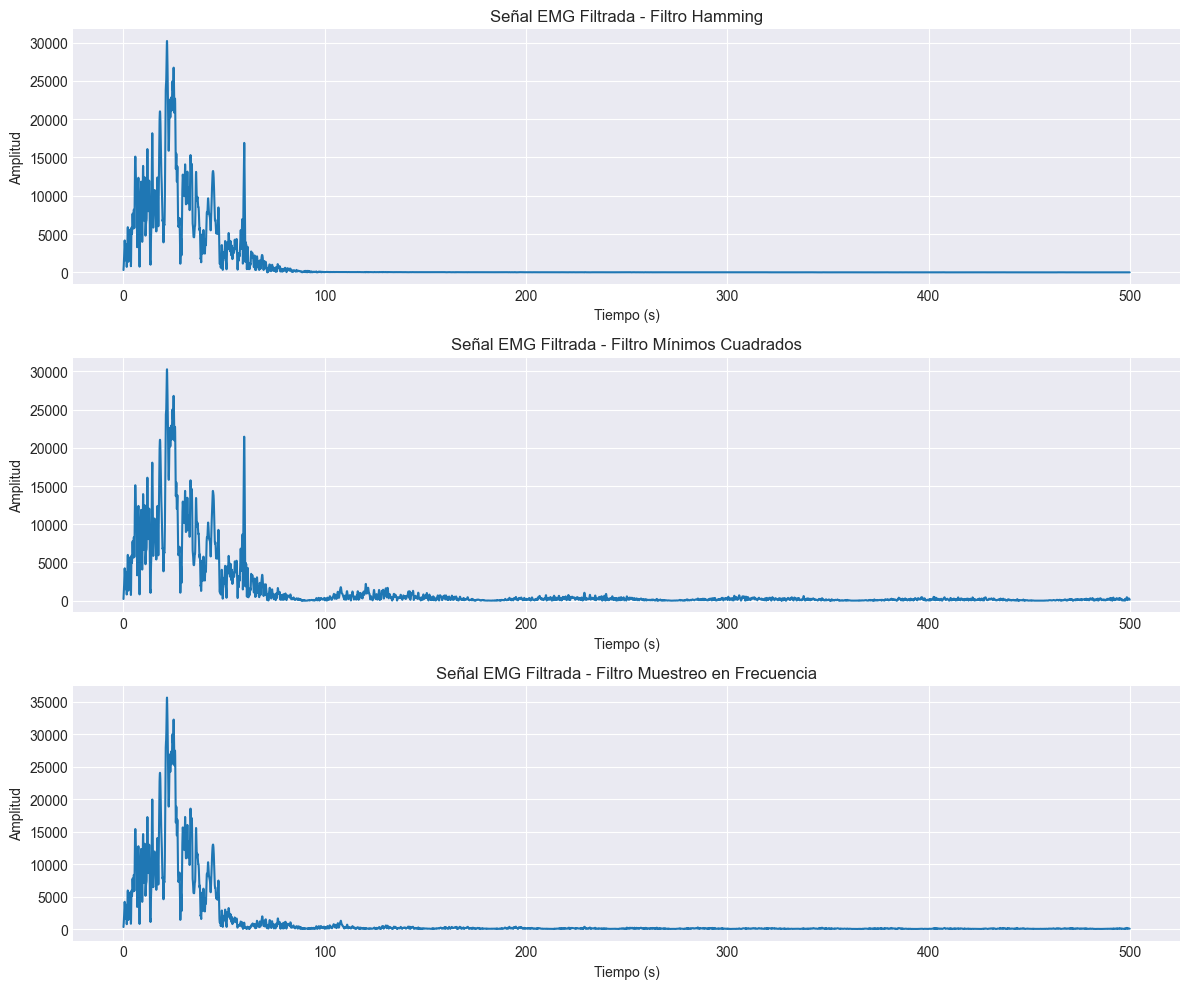

In [ ]:
from scipy.signal import lfilter

# Aplicar los filtros a la señal EMG
emg_hamming = lfilter(coeficiente_filtro_enventanado, 1, emg_signal)
emg_mincuad = lfilter(respuesta_impulsiva_minimos_cuadrados, 1, emg_signal)
emg_muestreo = lfilter(respuesta_impulsiva_frecuencia_muestreada, 1, emg_signal)


w, esp_hamming = freqz(emg_hamming, worN=8000, fs=fs)
w, esp_mincuad = freqz(emg_mincuad, worN=8000, fs=fs)
w, esp_muestreo = freqz(emg_muestreo, worN=8000, fs=fs)

plt.figure(figsize=(12, 10))
plt.subplot(3, 1, 1)
plt.plot(w, np.abs(esp_hamming), label="Filtro Hamming")
plt.title("Señal EMG Filtrada - Filtro Hamming")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")

plt.subplot(3, 1, 2)
plt.plot(w, np.abs(esp_mincuad), label="Filtro Mínimos Cuadrados")
plt.title("Señal EMG Filtrada - Filtro Mínimos Cuadrados")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")

plt.subplot(3, 1, 3)
plt.plot(w, np.abs(esp_muestreo), label="Filtro Muestreo en Frecuencia")
plt.title("Señal EMG Filtrada - Filtro Muestreo en Frecuencia")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")

plt.tight_layout()
plt.show()


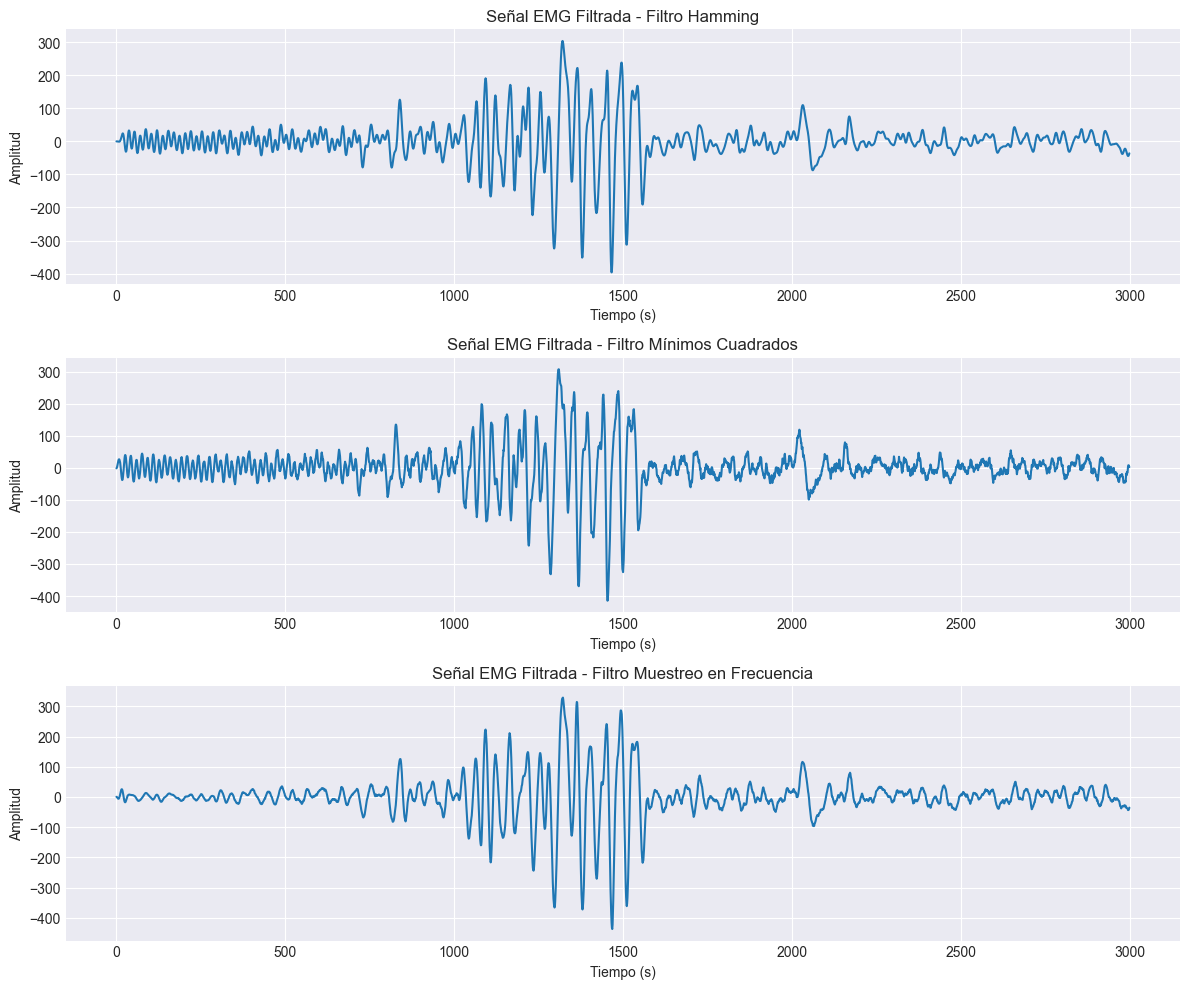

In [41]:
plt.figure(figsize=(12, 10))
plt.subplot(3, 1, 1)
plt.plot(emg_hamming, label="Filtro Hamming")
plt.title("Señal EMG Filtrada - Filtro Hamming")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")

plt.subplot(3, 1, 2)
plt.plot(emg_mincuad, label="Filtro Mínimos Cuadrados")
plt.title("Señal EMG Filtrada - Filtro Mínimos Cuadrados")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")

plt.subplot(3, 1, 3)
plt.plot(emg_muestreo, label="Filtro Muestreo en Frecuencia")
plt.title("Señal EMG Filtrada - Filtro Muestreo en Frecuencia")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")

plt.tight_layout()
plt.show()

Muestreo en frecuencia es mejor 

PREGUNTA 2
Se busca comparar el rendimiento de dos filtros IIR clásicos (Chebyshev y Butterworth) en la eliminación
de ruido en la señal EMG.

a) Diseñar un filtro Chebyshev tipo I de orden 2 utilizando el método de invariancia al impulso, con
frecuencia de corte de 50 Hz. Graficar la magnitud y la fase de la respuesta en frecuencia del
filtro (1 punto).

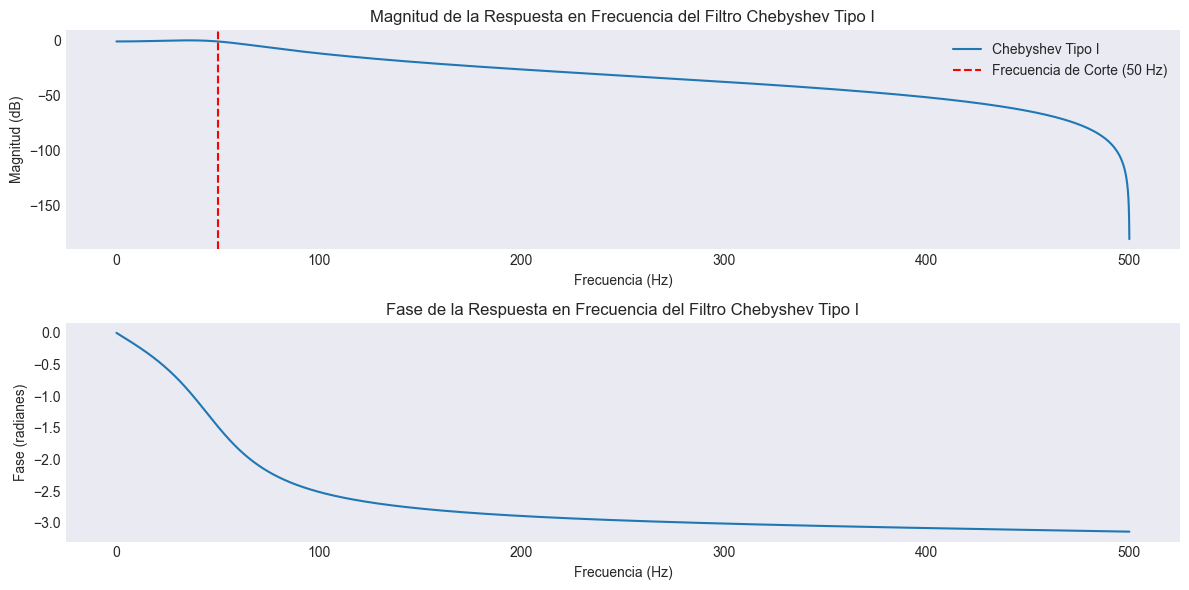

In [29]:
from scipy.signal import cheby1, freqz, lfilter

# Parámetros del filtro
fs = 1000  # Frecuencia de muestreo en Hz
fc = 50    # Frecuencia de corte en Hz
order = 2  # Orden del filtro
rp = 1     # Ripple en la banda de paso (1 dB)

# Diseño del filtro Chebyshev tipo I
b, a = cheby1(order, rp, fc / (fs / 2), btype='low', analog=False, output='ba')

# Respuesta en frecuencia del filtro
w, h = freqz(b, a, worN=8000, fs=fs)

# Graficar la respuesta en frecuencia
plt.figure(figsize=(12, 6))

# Magnitud
plt.subplot(2, 1, 1)
plt.plot(w, 20 * np.log10(np.abs(h)), label="Chebyshev Tipo I")
plt.title("Magnitud de la Respuesta en Frecuencia del Filtro Chebyshev Tipo I")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Magnitud (dB)")
plt.axvline(fc, color='red', linestyle='--', label="Frecuencia de Corte (50 Hz)")
plt.legend()
plt.grid()

# Fase
plt.subplot(2, 1, 2)
plt.plot(w, np.angle(h), label="Chebyshev Tipo I")
plt.title("Fase de la Respuesta en Frecuencia del Filtro Chebyshev Tipo I")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Fase (radianes)")
plt.grid()

plt.tight_layout()
plt.show()


b) Diseñar un filtro Butterworth de orden 2 utilizando la transformación bilineal y frecuencia de
corte de 50 Hz. Graficar la magnitud y la fase de la respuesta en frecuencia del filtro (1 punto).

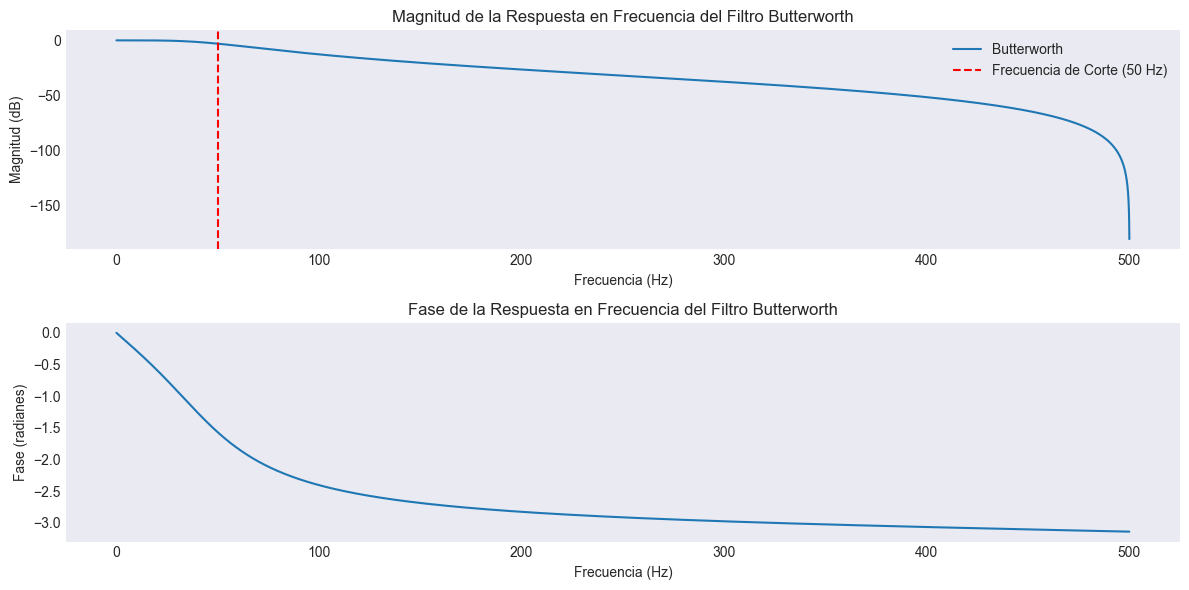

In [30]:
from scipy.signal import butter

# Diseño del filtro Butterworth
b_butter, a_butter = butter(order, fc / (fs / 2), btype='low', analog=False, output='ba')

# Respuesta en frecuencia del filtro Butterworth
w_butter, h_butter = freqz(b_butter, a_butter, worN=8000, fs=fs)

# Graficar la respuesta en frecuencia
plt.figure(figsize=(12, 6))

# Magnitud
plt.subplot(2, 1, 1)
plt.plot(w_butter, 20 * np.log10(np.abs(h_butter)), label="Butterworth")
plt.title("Magnitud de la Respuesta en Frecuencia del Filtro Butterworth")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Magnitud (dB)")
plt.axvline(fc, color='red', linestyle='--', label="Frecuencia de Corte (50 Hz)")
plt.legend()
plt.grid()

# Fase
plt.subplot(2, 1, 2)
plt.plot(w_butter, np.angle(h_butter), label="Butterworth")
plt.title("Fase de la Respuesta en Frecuencia del Filtro Butterworth")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Fase (radianes)")
plt.grid()

plt.tight_layout()
plt.show()


c) Aplicar ambos filtros (Chebyshev y Butterworth) a la señal EMG y graficar las señales filtradas
en el dominio del tiempo y las magnitudes de sus respectivas respuestas en el dominio de la frecuencia comparándolas con la magnitud de la respuesta en frecuencia de la señal original (1
punto).

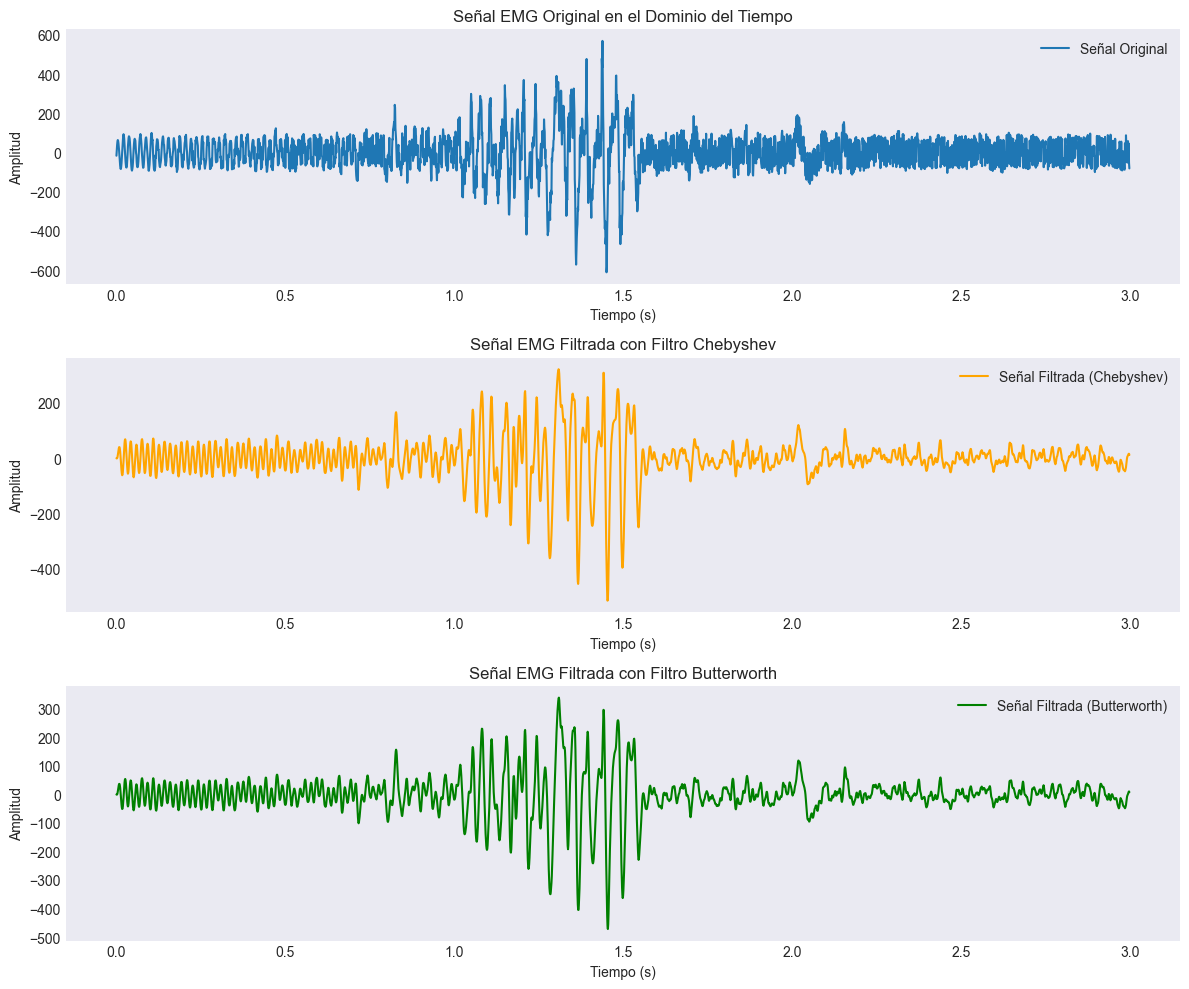

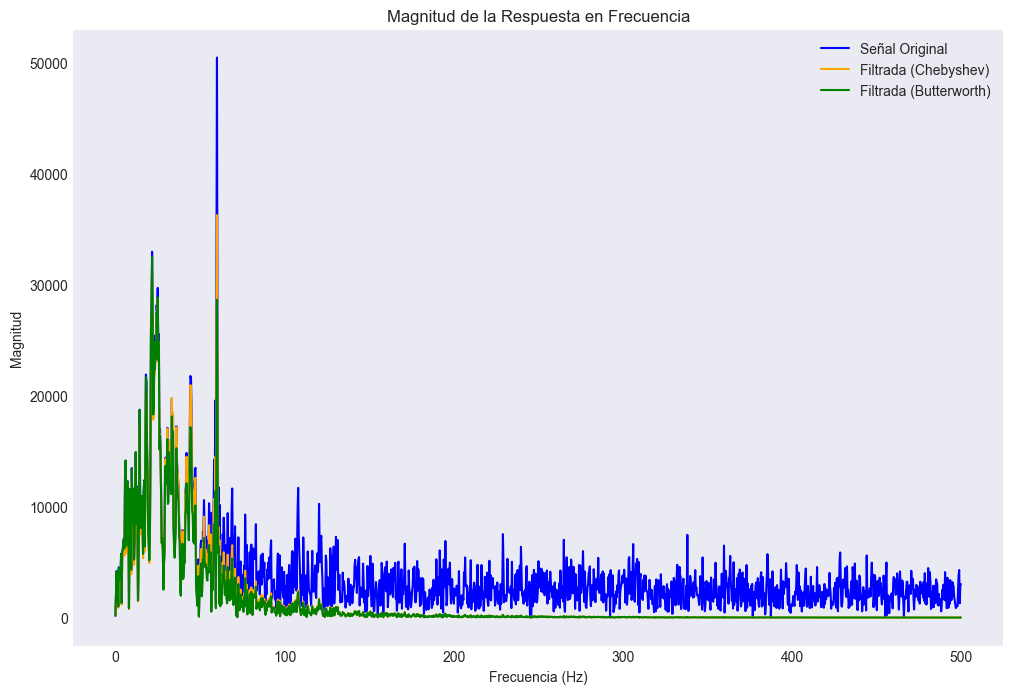

In [31]:
# Cargar la señal EMG
emg_signal = np.load("EMG_raw.npy")

# Aplicar el filtro Chebyshev
emg_filtered_cheby = lfilter(b, a, emg_signal)

# Aplicar el filtro Butterworth
emg_filtered_butter = lfilter(b_butter, a_butter, emg_signal)

# Graficar las señales en el dominio del tiempo
t = np.arange(len(emg_signal)) / fs
plt.figure(figsize=(12, 10))

plt.subplot(3, 1, 1)
plt.plot(t, emg_signal, label="Señal Original")
plt.title("Señal EMG Original en el Dominio del Tiempo")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.legend()
plt.grid()

plt.subplot(3, 1, 2)
plt.plot(t, emg_filtered_cheby, color='orange', label="Señal Filtrada (Chebyshev)")
plt.title("Señal EMG Filtrada con Filtro Chebyshev")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.legend()
plt.grid()

plt.subplot(3, 1, 3)
plt.plot(t, emg_filtered_butter, color='green', label="Señal Filtrada (Butterworth)")
plt.title("Señal EMG Filtrada con Filtro Butterworth")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

# Calcular la Transformada de Fourier de las señales
freqs = np.fft.fftfreq(len(emg_signal), 1/fs)
emg_fft = np.fft.fft(emg_signal)
cheby_fft = np.fft.fft(emg_filtered_cheby)
butter_fft = np.fft.fft(emg_filtered_butter)

# Graficar la magnitud de la respuesta en frecuencia
plt.figure(figsize=(12, 8))

# Magnitud de la señal original
plt.plot(freqs[:len(freqs)//2], np.abs(emg_fft[:len(freqs)//2]), label="Señal Original", color='blue')
# Magnitud de la señal filtrada Chebyshev
plt.plot(freqs[:len(freqs)//2], np.abs(cheby_fft[:len(freqs)//2]), label="Filtrada (Chebyshev)", color='orange')
# Magnitud de la señal filtrada Butterworth
plt.plot(freqs[:len(freqs)//2], np.abs(butter_fft[:len(freqs)//2]), label="Filtrada (Butterworth)", color='green')

plt.title("Magnitud de la Respuesta en Frecuencia")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Magnitud")
plt.legend()
plt.grid()
plt.show()


PREGUNTA 3 
Se busca analizar las diferencias del retardo de grupo entre filtros FIR e IIR.

a) Graficar las señales filtradas utilizando el filtro FIR de Hamming y el filtro Butterworth entre 1 y
2.5 segundos de la señal EMG, comparándolas en el dominio del tiempo. Mencionar las
diferencias observadas (0.5 puntos)

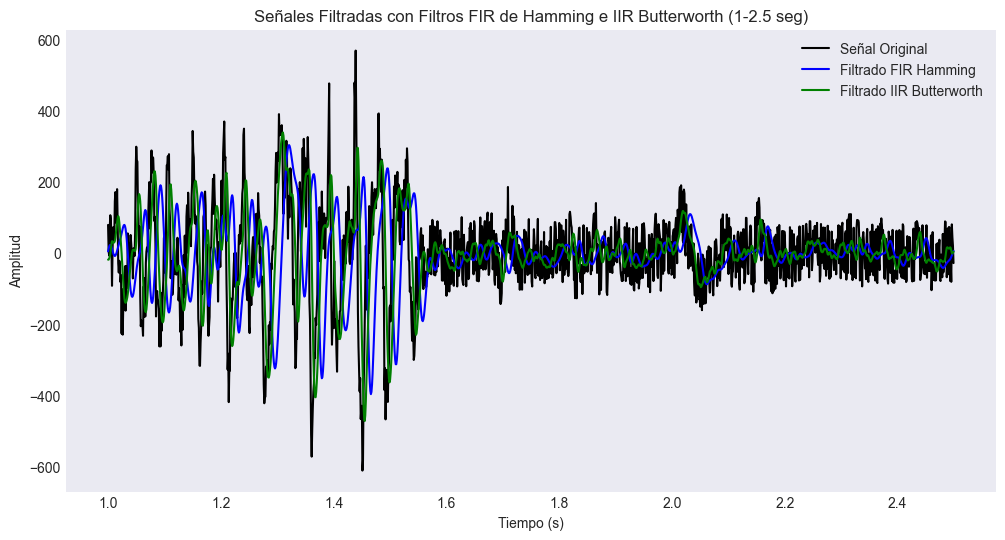

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import firwin, butter, lfilter

# Parámetros generales
fs = 1000  # Frecuencia de muestreo en Hz
fc = 50    # Frecuencia de corte en Hz
t = np.arange(0, 5, 1/fs)  # Vector de tiempo de 5 segundos

# Cargar la señal EMG
emg_signal = np.load("EMG_raw.npy")

# Diseño del filtro FIR con ventana de Hamming
num_taps = 33
fir_coeffs = firwin(num_taps, fc, fs=fs, window="hamming")
emg_fir_filtered = lfilter(fir_coeffs, 1, emg_signal)

# Diseño del filtro Butterworth IIR
order = 2
b_butter, a_butter = butter(order, fc / (fs / 2), btype='low', analog=False)
emg_butter_filtered = lfilter(b_butter, a_butter, emg_signal)

# Graficar señales filtradas en el intervalo de tiempo 1-2.5 segundos
start_time = 1
end_time = 2.5
start_idx = int(start_time * fs)
end_idx = int(end_time * fs)

plt.figure(figsize=(12, 6))
plt.plot(t[start_idx:end_idx], emg_signal[start_idx:end_idx], label="Señal Original", color="black")
plt.plot(t[start_idx:end_idx], emg_fir_filtered[start_idx:end_idx], label="Filtrado FIR Hamming", color="blue")
plt.plot(t[start_idx:end_idx], emg_butter_filtered[start_idx:end_idx], label="Filtrado IIR Butterworth", color="green")

plt.title("Señales Filtradas con Filtros FIR de Hamming e IIR Butterworth (1-2.5 seg)")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.legend()
plt.grid()
plt.show()


b) Calcular y graficar el retardo de grupo del filtro FIR de Hamming (Sugerencia: Investigue el
comando group_delay de scipy.signal) y del filtro IIR Butterworth (1.5 puntos).


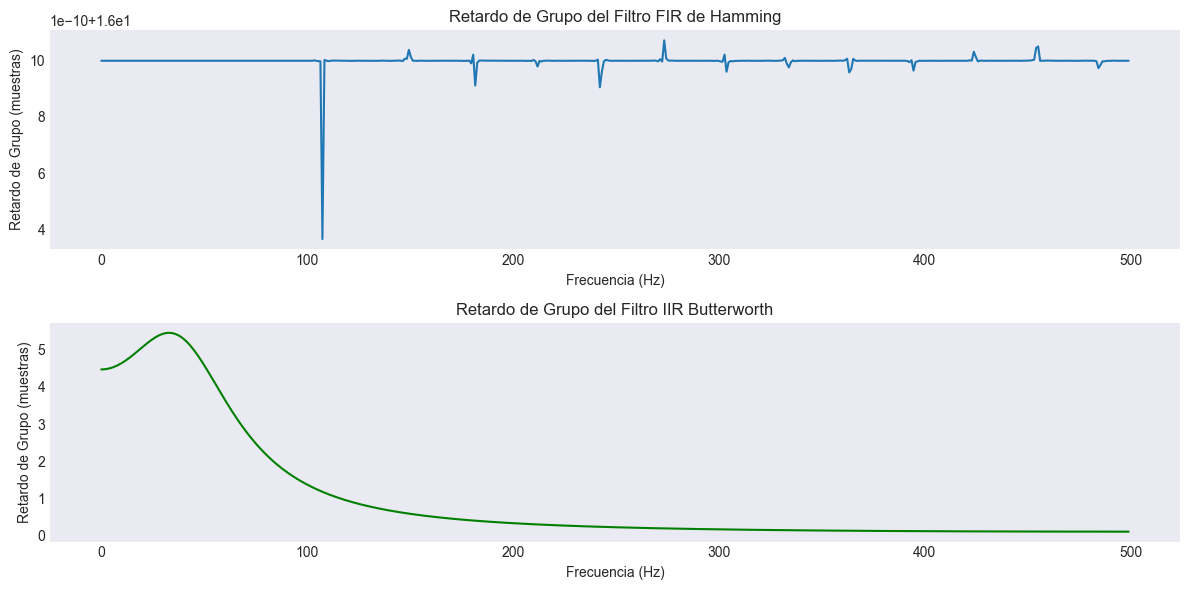

In [33]:
from scipy.signal import group_delay

# Calcular el retardo de grupo del filtro FIR de Hamming
w_fir, gd_fir = group_delay((fir_coeffs, 1), fs=fs)

# Calcular el retardo de grupo del filtro Butterworth
w_butter, gd_butter = group_delay((b_butter, a_butter), fs=fs)

# Graficar el retardo de grupo de ambos filtros
plt.figure(figsize=(12, 6))

# Retardo de grupo FIR
plt.subplot(2, 1, 1)
plt.plot(w_fir, gd_fir, label="Retardo de Grupo FIR Hamming")
plt.title("Retardo de Grupo del Filtro FIR de Hamming")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Retardo de Grupo (muestras)")
plt.grid()

# Retardo de grupo Butterworth
plt.subplot(2, 1, 2)
plt.plot(w_butter, gd_butter, label="Retardo de Grupo IIR Butterworth", color="green")
plt.title("Retardo de Grupo del Filtro IIR Butterworth")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Retardo de Grupo (muestras)")
plt.grid()

plt.tight_layout()
plt.show()


c) Corregir la señal filtrada con el filtro FIR de Hamming aplicando el retardo de grupo calculado
previamente. Graficar la señal filtrada original y la señal filtrada corregida en el dominio del
tiempo, comparándolas entre 1 y 2.5 segundos respecto a la señal original (1.5 puntos).

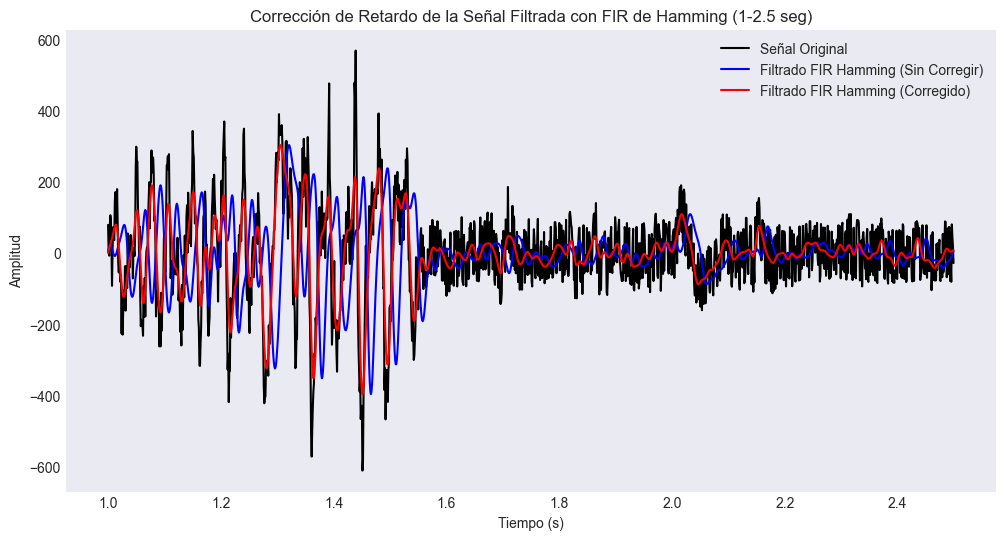

In [34]:
# Calcular el retardo de grupo promedio para el filtro FIR de Hamming
group_delay_fir = int(np.mean(gd_fir))

# Aplicar la corrección del retardo a la señal filtrada con el FIR de Hamming
emg_fir_corrected = np.roll(emg_fir_filtered, -group_delay_fir)

# Graficar señales en el dominio del tiempo entre 1 y 2.5 segundos
plt.figure(figsize=(12, 6))
plt.plot(t[start_idx:end_idx], emg_signal[start_idx:end_idx], label="Señal Original", color="black")
plt.plot(t[start_idx:end_idx], emg_fir_filtered[start_idx:end_idx], label="Filtrado FIR Hamming (Sin Corregir)", color="blue")
plt.plot(t[start_idx:end_idx], emg_fir_corrected[start_idx:end_idx], label="Filtrado FIR Hamming (Corregido)", color="red")

plt.title("Corrección de Retardo de la Señal Filtrada con FIR de Hamming (1-2.5 seg)")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.legend()
plt.grid()
plt.show()
